In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import altair as alt
%matplotlib inline

C:\Users\riznet\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dat2= pd.read_csv('water_consum_floodplain.csv')

In [11]:
sns.set(style='ticks', context='talk')
plt.style.use('dark_background')

In [2]:
dataset = pd.read_csv('C:\VOLGA.csv', encoding = 'utf-8', sep=';')
dataset = dataset.drop('Total', axis=1)
dataset.replace(0, np.nan, inplace=True)
dataset.interpolate(inplace=True)
dat1 = pd.DataFrame
dat1 = dataset.set_index(dataset.pop('Year').astype(str)).stack().reset_index(name='Volume')
dat1['Year'] = dat1.pop('level_1')+ '-' + dat1['Year']
dat1.set_index('Year', inplace=True)
dat2 = pd.DataFrame(dat1.loc['Apr-2013': 'Dec-2016', 'Volume'])

In [131]:
dat2['wat_balance'] = dat2.income - dat2.discharge

In [139]:
dat2.to_csv('water_consum_floodplain.csv', encoding = 'utf-8')

,discharge,income,wat_balance
Year,,,
Apr-2013,31.72,27.99,-3.73
May-2013,62.15,52.76,-9.39
Jun-2013,37.59,36.03,-1.56
Jul-2013,17.82,16.15,-1.67
Aug-2013,16.05,13.34,-2.71
Sep-2013,14.53,12.62,-1.91
Oct-2013,15.81,13.18,-2.63
Nov-2013,18.30,14.41,-3.89
Dec-2013,21.60,17.20,-4.40


In [44]:
alt.Chart(dat2).mark_point().encode(
    x='discharge',
    y='income')


alt.Chart(...)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 1440x720 with 0 Axes>

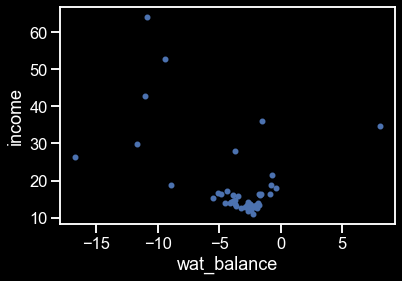

In [61]:
plt.figure(figsize=(20,10))
dat2.plot(kind='scatter', x='wat_balance', y='income')

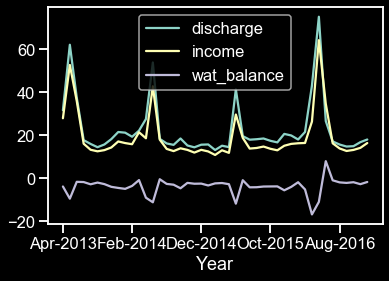

In [136]:
#plt.figure(figsize=(20,10))
dat2.plot()

In [45]:
sal = pd.read_csv('C:/Users/riznet/1volzhsk.csv', encoding = 'utf-8', sep=';')

In [46]:
sal['date']  = pd.to_datetime(sal.date, errors='coerce', format='%Y-%m-%d')
sal.index = sal.date

In [47]:
s = sal.resample('M', on='date')['discharge'].sum()
df1=pd.DataFrame(s)

In [55]:
df2= pd.DataFrame(df1.loc['2017-01-01':'2021-06-20'])
df2.reset_index(inplace=True)

In [56]:
df2['dichargeR'] = round(df2.discharge/10000,2)

In [58]:
df2.drop('discharge', axis=1, inplace=True)

In [59]:
df2.to_csv('volzhsk_discharge_till2021.csv',encoding = 'utf-8')